# Regresiones lineales simples

Vamos a discutir los siguientes temas: 
1. Entender qué problemas puede resolver el aprendizaje automático
2. Qué problemas puede resolver un modelo de regresiónLos puntos fuertes y débiles de la correlación
3. Cómo se extienden las correlaciones a un modelo de regresión simple
4. Cuándo, qué y por qué del modelo de regresión
5. Las matemáticas esenciales detrás del método de gradiente

En el proceso, utilizaremos cierta terminología y conceptos estadísticos para ofrecerle la perspectiva de la regresión lineal en el marco más amplio de la estadística, aunque nuestro enfoque seguirá siendo práctico.

## Definición del problema 
El aprendizaje automático tiene sólidas raíces en años de investigación: realmente ha sido un largo viaje desde finales de los años cincuenta, cuando Arthur Samuel aclaró que el aprendizaje automático era un "campo de estudio que da a los ordenadores la capacidad de aprender sin ser explícitamente programados".

En general, los algoritmos de aprendizaje automático pueden aprender de tres maneras:

1. Aprendizaje supervisado: Es cuando presentamos ejemplos etiquetados para aprender. 
2. Aprendizaje no supervisado: Es cuando presentamos ejemplos sin ninguna pista, dejando dejar que el algoritmo cree una etiqueta. 
3. Aprendizaje por refuerzo: Es cuando presentamos ejemplos sin etiquetas, como en el aprendizaje no supervisado, pero obtenemos información del entorno sobre si la suposición de la etiqueta es correcta o no.

El aprendizaje no supervisado tiene importantes aplicaciones en la visión robótica y la creación de características automáticas, y el aprendizaje por refuerzo es fundamental para el desarrollo de la IA autónoma (por ejemplo, en robótica, pero también en la creación de agentes de software inteligentes).

Sin embargo, el aprendizaje supervisado es el más importante en la ciencia de los datos porque nos permite hacer predicciones. 

## Notación

* En el formalismo matemático, llamamos al resultado que queremos predecir la respuesta o variable objetivo y solemos etiquetarla con la letra minúscula $y$.
* En cambio, las premisas se denominan variables predictivas, o simplemente atributos o características, y se etiquetan con una $x$ minúscula si hay una sola y con una $X$ mayúscula si hay muchas.
* Con letras mayúsculas denotaremos matrices, incluidos los vectores que, técnicamente son matrix columnas (o renglones).
* También es importante tener siempre en cuenta las dimensiones de X e y; así, por convención, podemos llamar n al número de observaciones y p al número de variables.

## Vectores y matrices con Numpy

Todos los datos los representaremos en forma de matrices. Ahora mostraremos algunas formas de construir matrices (y vectores) con `numpy`.

In [1]:
# vector a partir de listas
import numpy as np

vector = np.array([1,2,3,4,5])
print(vector)
print(vector.shape)

[1 2 3 4 5]
(5,)


In [2]:
vector_columna = vector.reshape((5,1))
print(vector_columna)
print(vector_columna.shape)

[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)


In [3]:
vector_renglon = vector.reshape((1,5))
print(vector_renglon)
print(vector_renglon.shape)

[[1 2 3 4 5]]
(1, 5)


In [4]:
# es posible crear matrices de manera aleatoria

np.random.seed(0)

print(np.random.randint(10, size=(2,2)))
print(np.random.normal(0, 10, size=(2,2)))
print(np.random.binomial(10, .25, size=(2,2)))
print(np.random.poisson(10, size=(2,2)))

[[5 0]
 [3 3]]
[[  3.70255385  10.40530751]
 [-15.16982735  -8.66276211]]
[[1 2]
 [2 4]]
[[10 14]
 [11 17]]


In [5]:
# existen otras maneras de crear matrices
print(np.zeros((5,2)), "\n")
print(np.ones(5), "\n")
print(np.array(range(20)).reshape((5,4)), "\n")

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

[1. 1. 1. 1. 1.] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]] 



## La familia de modelos lineales

En estadística, la familia de modelos lineales se denomina modelo lineal generalizado (MLG). Mediante transformaciones, restricciones y métodos de optimización, los MLG pueden resolver una amplia gama de problemas diferentes.

En este curso, no nos extenderemos más allá de lo necesario para el campo estadístico. Sin embargo, propondremos un par de modelos de la gran familia de los MLG, a saber, la regresión lineal y la regresión logística; ambos métodos son apropiados para resolver los dos problemas más básicos de la ciencia de los datos: la regresión y la clasificación.

## Preparación para descubrir una regresión lineal simple

Un conjunto de datos es una estructura de datos que contiene variables de predicción y, a veces, de respuesta. A efectos de aprendizaje automático, puede estructurarse en forma de matriz, en forma de tabla con filas y columnas.

Para la presentación inicial de la regresión lineal en su versión simple (utilizando únicamente una variable predictiva para pronosticar la variable de respuesta), hemos elegido un par de conjuntos de datos relativos a la evaluación inmobiliaria.

El primer conjunto de datos es conocido. Tomado del artículo de 
    *Harrison, D. y Rubinfeld, D.L. Hedonic Housing Prices and the Demand for Clean Air (J. Environ. Economics & Management, vol.5, 81-102, 1978)*, 
el conjunto de datos puede encontrarse en muchos paquetes de análisis y está presente en el sitio web de la U.S. paquetes de análisis y está presente en la UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Housing).

El conjunto de datos está formado por 506 secciones censales de Boston del censo de 1970 y presenta 21 variables relativas a diversos aspectos que pueden influir en el valor de los inmuebles. El objetivo es el valor monetario medio de las viviendas, expresado en miles de dólares. 

Entre las características disponibles, hay algunas bastante obvias, como el número de habitaciones, la antigüedad de los edificios y los niveles de delincuencia en el barrio, y otras menos obvias, como la concentración de contaminación, la disponibilidad de escuelas cercanas escuelas, el acceso a las autopistas y la distancia a los centros de trabajo.

El segundo conjunto de datos del repositorio Statlib de la Universidad Carnegie Mellon (https://archive.ics.uci.edu/ml/datasets/Housing) contiene 20.640 observaciones derivadas del censo de Estados Unidos de 1990.

* Cada observación es una serie de estadísticas (9 variables predictivas) de un grupo de bloques, es decir, aproximadamente 1.425 personas que viven en una zona geográficamente compacta. 
* La variable de respuesta es un indicador del valor de la vivienda de ese bloque (técnicamente es el logaritmo natural del valor medio de la vivienda en el momento del censo).
* Las variables predictoras son básicamente la mediana de los ingresos.

In [6]:
"""
Importaremos ambos conjuntos para su análisis
"""
# el conjunto de California tiene que descargarse
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
type(california)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# el conjunto de Boston ya está incluido
# es en este conjunto en el que nos enfocaremos
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

C:\Users\julih\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

sklearn.utils.Bunch

In [ ]:
"""
Importaremos los paquetes necesarios
1. numpy: análisis numérico
2. pandas: marcos de datos
3. matplotlib: trazo de gráficas
"""
import pandas as pd

In [ ]:
# convertimos los datos de Boston en un marco de datos
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Aunque una regresión lineal es simple, en realidad el modelo más sencillo es *la media* aritmética. Sin embargo, esta solamente funciona relativamente bien si los datos están normalmente distribuidos.

In [ ]:
"""
Densidad normal y su implementación en Python
"""
# pyplot será nuestra herramienta básica para graficar
import matplotlib.pyplot as plt
# un viejo conocido
import numpy as np
# importamos la clase que modela las variables normales
from scipy.stats import norm

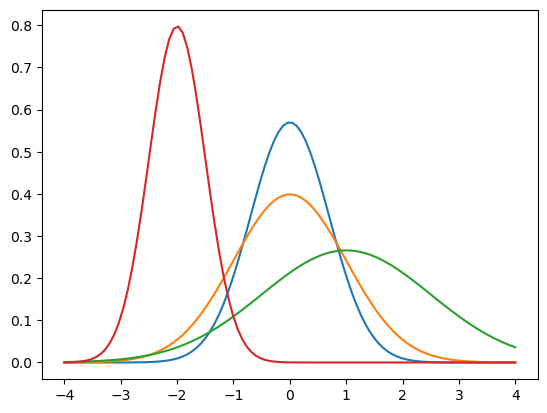

In [ ]:
"""
Forma de la función de densidad normal
"""
# linspace(a, b, n) crea una malla de punto desde `a` hasta `b`
# separados por `n` sub intervalos
x = np.linspace(-4,4,100)
# trazaremos las gráficas de la distribución normal para diferentes parámetros
for mean, variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    # pdf = probability density function
    # es la función puntual de probabilidad
    y = norm(loc=mean,scale=variance).pdf(x)
    plt.plot(x,y)
plt.show()

<AxesSubplot:ylabel='Frequency'>

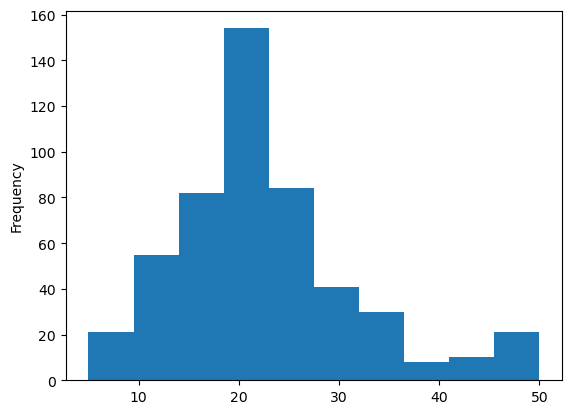

In [ ]:
"""
Trazamos el histograma de la variable objetivo del marco de datos
"""
dataset["target"].plot(
    kind="hist"
)

<AxesSubplot:ylabel='Density'>

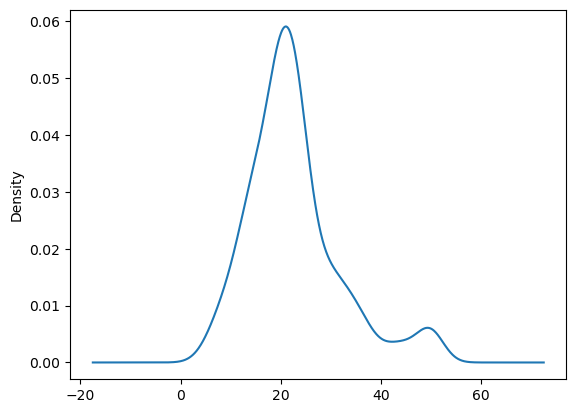

In [ ]:
"""
Ahora, bosquejemos una función de densidad aproximada
"""
dataset["target"].plot(
    kind="kde"
)

In [ ]:
from scipy.stats import skew,kurtosis
info = """
Estadísticos 
{}

Asimetría (Skewness): {}
Curtosis (Kurtosis):{}
""".format(dataset["target"].describe(),
      #dataset["target"].skew(),
        skew(dataset["target"]),
      #dataset["target"].kurtosis())
           kurtosis(dataset["target"], fisher=True)
          )
print(info)


Estadísticos 
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

Asimetría (Skewness): 1.104810822864635
Curtosis (Kurtosis):1.4686287722747462



Como podemos observar, la distribución tiene *asimetría positiva* y *leptocurtosis*. Para más detalles de este concepto consulta [Kurtosis() & Skew() Function In Pandas](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de) y la documentación correspondiente de Scipy para las funciones [skew()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) y [kurtosis()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html).

Ahora podemos evaluar los resultados midiendo el error producido en la predicción de los valores reales de "y" por esta regla. La estadística sugiere que, para medir la diferencia entre la predicción y el valor real, debemos elevar al cuadrado las diferencias y luego sumarlas todas. Este se denomina suma de errores al cuadrado:

In [ ]:
# pd.Series nos permite tratar una columna como una Serie de datos
# en la que podemos aplicar directamente operadores como la exponenciación
mean_expected_value = dataset["target"].mean()
print(mean_expected_value)
Squared_errors = pd.Series(dataset['target']-mean_expected_value)**2
SSE = np.sum(Squared_errors)
print('Sum of Squared Errors (SSE): {:.1f}'.format(SSE))

22.532806324110698
Sum of Squared Errors (SSE): 42716.3


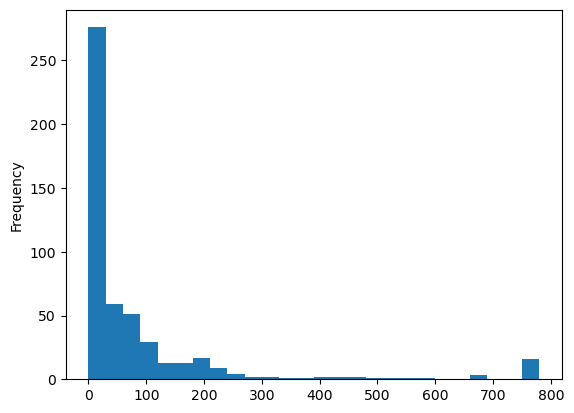

In [ ]:
"""
Generaremos un histograma para analizar la distribución de los errores cuadráticos
"""
density_plot = Squared_errors.plot(
    kind='hist', 
    bins=range(0, 800, 30)
)

## Como medir las relaciones lineales

En estadística, hay una cantidad que ayuda a medir cómo se relacionan dos variables: **la correlación.**

Primero estandarizaremos las variables de la siguiente manera $$x=\frac{x-\bar{x}}{\sigma}$$

In [ ]:
"""
En Python se puede lograr vía la siguiente función

La desviación estándar, denotada por la letra griega sigma es la raíz cuadrada 
de la media de las desviaciones al cuadrado de la media, es decir, 
std = sqrt(mean(x)), where x = abs(a - a.mean())**2.

En Numpy, está implementada como la función std()
"""

def standardize(random_variable):
    return (random_variable - np.mean(random_variable))/np.std(random_variable)

A continuación definimos la covarianza, la cual será positiva si la relación es directa (cuando $x$ crece también $y$ lo hace) y si es negativa, la relación es indirecta (cuando $x$ crece, $y$ decrece). Definimos la covarianza como

$$cov(x,y)=\frac{1}{n} \sum(x-\bar{x})(y-\bar{y})$$

In [ ]:
"""
Implementación de la covarianza en Python
"""
def covariance(variable_1, variable_2, bias=0):
    n_obs = len(variable_1)
    delta_1 = variable_1 - np.mean(variable_1)
    delta_2 = variable_2 - np.mean(variable_2)    
    return np.sum(delta_1*delta_2)/(n_obs - int(bias))

Finalmente, definimos el coeficiente $r$ correlación de Pearson, cuyas propiedades más relevantes son
1. El valor del índice de correlación varía en el intervalo \[-1,1\], indicando el signo el sentido de la relación:
2. Si r=1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
3. Si 0<r<1 entonces existe una correlación positiva.
4. Si r=0 entonces no existe relación lineal, pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
5. Si -1<r<0, existe una correlación negativa.
6. Si r=-1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

Esta correlación se define como 
$$r(x,y)=\frac{1}{n} \frac{\sum(x-\bar{x})(y-\bar{y})}{\sigma_x \sigma_y}$$

Sin embargo, observa que se puede definir de manera equivalente a partir de la covarianza y de la de estandarización:

In [ ]:
"""
Implementaremos la correlación de Pearson de la siguiente manera:
"""
def correlation(var1,var2,bias=False):
    return covariance(standardize(var1), standardize(var2), bias)

In [ ]:
"""
Ahora calcularemos nuestra implementación en el ejemplo anterior 
y la compararemos con las funciones propias de Scipy
"""
from scipy.stats.stats import pearsonr
r = correlation(dataset["RM"], dataset["target"])
# {dato:.5f} nos permite inserta el dato que ingresamos como argumento en format() 
# con cinco decimates de precisión
print("Nuestra estimación del coeficiente de correlación: r={dato:.5f}".format(dato=r))
r_sp, _ = pearsonr(dataset["RM"], dataset["target"])
print("Estimación del coeficiente con Scipy: r={dato:.5f}".format(dato=r_sp))
print(_)

Nuestra estimación del coeficiente de correlación: r=0.69536
Estimación del coeficiente con Scipy: r=0.69536
2.487228871008081e-74


C:\Users\julih\AppData\Local\Temp\ipykernel_16496\757954035.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


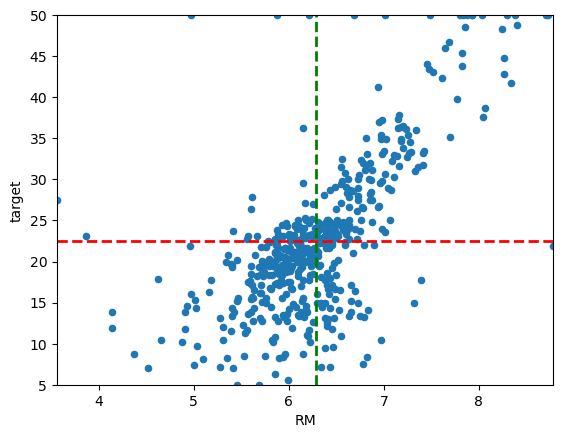

In [ ]:
"""
Graficaremos el diagrama de dispersión para visualizar los resultados
"""
x_range = [dataset["RM"].min(), dataset["RM"].max()]
y_range = [dataset["target"].min(), dataset["target"].max()]
scatter_plot = dataset.plot(
    kind="scatter", x="RM", y="target",
    xlim = x_range, 
    ylim = y_range
)

media_Y = scatter_plot.plot(
    x_range, 
    [dataset["target"].mean(), dataset["target"].mean()], 
    "--",
    color="red", 
    linewidth=2
)

media_X = scatter_plot.plot(
    [dataset["RM"].mean(), dataset["RM"].mean()], 
    y_range, 
    "--",
    color="green", 
    linewidth=2
)

**¿Qué implicación tiene la correlación que obtuvimos anteriormente, con la distribución de los puntos cuadrante a cuadrante?**

## Regresiones lineales con Statsmodels

Formalmente, una regresión lineal es una relación de la forma
$$y =  X \beta   + \beta_0$$
donde
* $y$ es un vector columna con registros de la respuesta
* $X$ es un vector columna con registros del predictor
* $\beta, \beta_0$ escalares
* $\beta_0$ se conoce como *sesgo*
* $\beta_1$ se conoce como *peso*

Existen dos métodos para generar regresiones lineales con el paquete `Statsmodels`:
1. `statsmodels.api`: Funciona con variables predictoras y de respuesta distintas y requiere que se defina cualquier transformación de las variables en la variable predictora, incluyendo la adición de la ordenada al origen.
2. `statsmodels.formula.api`: Funciona de forma similar a R, permitiendo especificar una forma funcional (la fórmula de la suma de los predictores).

Ilustraremos nuestro ejemplo usando `statsModels.api`. Sin embargo, también mostraremos un método alternativo con `statsmodels.formula.api.`

In [ ]:
"""
Importaremos ambos módulos y definiremos las variables
"""

import statsmodels.api as sm

y = dataset['target']
X = dataset['RM']
print(X)


0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


In [ ]:
# La variable X debe ampliarse con un valor constante; 
# el sesgo se calculará en consecuencia.
X = sm.add_constant(X)
print(X)

     const     RM
0      1.0  6.575
1      1.0  6.421
2      1.0  7.185
3      1.0  6.998
4      1.0  7.147
..     ...    ...
501    1.0  6.593
502    1.0  6.120
503    1.0  6.976
504    1.0  6.794
505    1.0  6.030

[506 rows x 2 columns]


Como mencionamos, la fórmula de regresión es $y =  X \beta + \beta_0$, pero al hacer la transformación anterior se reduce a $y= (1:X)(\beta_0, \beta)'=\bar{X}\bar{\beta}$.

In [ ]:
"""
Implementación con SM
"""
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
# imprimimos un resumen de los parámetros y estadísticos de la regresión
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           2.49e-74
Time:                        06:49:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
"""
La información de mayor interés para nosotros es los coeficientes y las predicciones
"""
print(fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)
print(fitted_values)

const   -34.670621
RM        9.102109
dtype: float64
0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64


In [ ]:
"""
Un valor importante a considerar es `R-squared`. Este es el coeficiente de determinación, 
una medida de lo bien que lo hace la regresión con respecto a una media simple. 
También se puede calcular de la siguiente manera:
"""
# diferencia de cuadrados respecto a la media
total_variation = np.sum((dataset['target']-dataset['target'].mean())**2)
# diferencia de cuadrados respecto a la regresión
unexplained_variation = np.sum((dataset['target']-fitted_values)**2)
# diferencia relativa entre la media y la regresión
R2 = 1 - unexplained_variation/total_variation
print(np.round(R2, 3))

0.484


Para ahondar en la definición del valor R-cuadrada, consulta los siguientes artículos:
* [R-Squared Definition](https://www.investopedia.com/terms/r/r-squared.asp)
* [R-Squared vs. Adjusted R-Squared: What's the Difference?](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp)

Para más detalles sobre el significado de los diferentes parámetros y estadísticos del resumen, consulta el documento adjunto que te proporcionamos. 

In [ ]:
"""
Observación: La media siempre está contenida en la regresión lineal
"""
X_mean = np.mean(X)
print(X_mean)
y_mean = np.mean(y)
print(y_mean)
print(fitted_model.predict(X_mean))

const    1.000000
RM       6.284634
dtype: float64
22.532806324110698
None    22.532806
dtype: float64


C:\Users\julih\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
"""
Observa que para algunos valores de x, la predicción se vuelve negativa
"""
fitted_model.predict([1,1])

array([-25.5685118])

Esto nos deja una importante lección: **Una regresión lineal siempre puede trabajar dentro del rango de valores que aprendió (esto se llama interpolación) pero puede proporcionar valores correctos para sus límites de aprendizaje (una actividad predictiva diferente llamada extrapolación) únicamente en determinadas condiciones.**

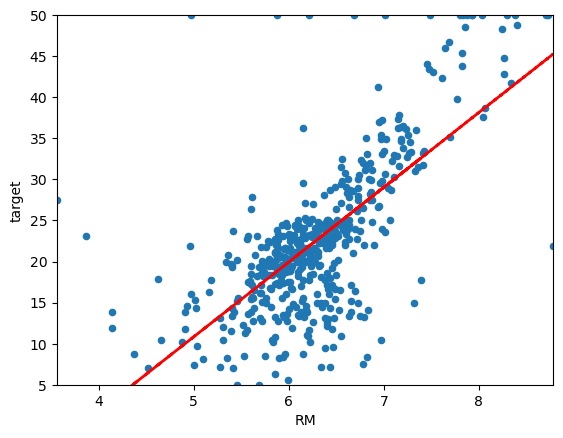

In [ ]:
scatter_plot = dataset.plot(
    kind="scatter", x="RM", y="target",
    xlim = x_range, 
    ylim = y_range
)

scatter_plot.plot(
    dataset["RM"], fitted_values,     
    "--",
    color="red", 
    linewidth=2
)

## Evaluación de los valores ajustados

Existen algunos problemas a los que debemos estar atentos:
1. **Valores demasiado alejados de la media.** Los residuos estandarizados grandes indican una grave dificultad al modelar dichas observaciones. Además, en el proceso de aprendizaje de estos valores, *los coeficientes de regresión pueden haber sido distorsionados.*
2. La varianza no homogénea señala que la regresión no funciona correctamente cuando el predictor tiene determinados valores.
3. Las formas extrañas en la nube de puntos residuales pueden indicar que se necesita un modelo más complejo para los datos que estás analizando.

En nuestro caso, podemos calcular fácilmente los residuos restando los valores ajustados de la regresión y luego trazando los residuos estandarizados resultantes en un gráfico.

In [ ]:
# Los residuales son la diferencia entre los datos y los valores ajustados
residuals = dataset['target']-fitted_values
# Normalizamos los residuales para entender su comportamiento estadístico
# respecto a la regresión lineal
normalized_residuals = standardize(residuals)
# En este caso, las unidades son desviaciones estándar
normalized_residuals.describe()

count    5.060000e+02
mean    -1.272588e-17
std      1.000990e+00
min     -3.535612e+00
25%     -3.858019e-01
50%      1.359408e-02
75%      4.521429e-01
max      5.971939e+00
dtype: float64

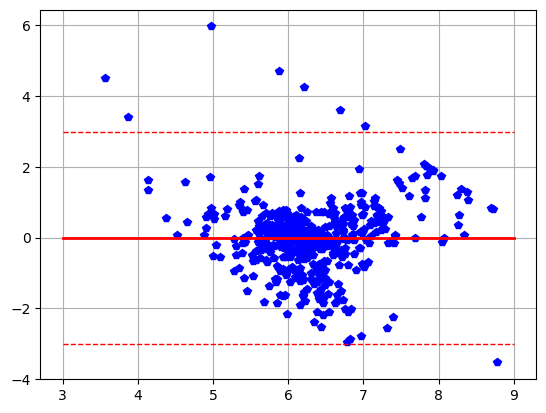

In [ ]:
residual_scatter_plot = plt.plot(dataset['RM'],
                                 normalized_residuals,'bp')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-',
                         color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--',
                       color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', 
                       color='red', linewidth=1)
malla = plt.grid()
plt.show()

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

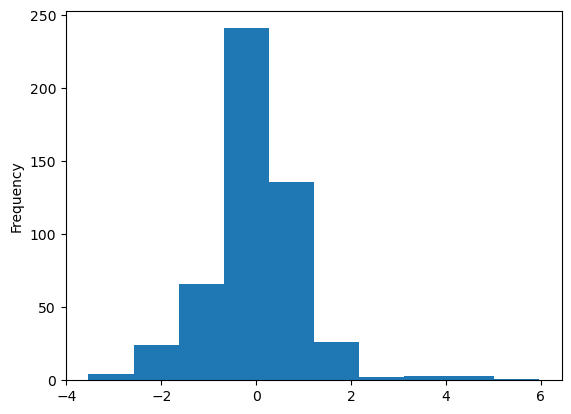

In [ ]:
# Histograma de los residuales normalizados
print(type(normalized_residuals))
normalized_residuals.plot.hist()

<AxesSubplot:ylabel='Density'>

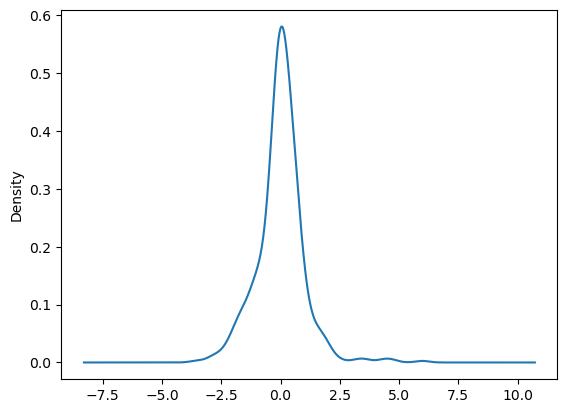

In [ ]:
# Trazamos una función aproximada de densidad
normalized_residuals.plot.kde()

El gráfico de dispersión resultante indica que los residuos muestran algunos de los problemas que mencionamos 
anteriormente, como una advertencia de que algo no va bien con tu análisis de regresión.

En primer lugar, hay algunos puntos que se encuentran fuera de la banda delimitada por las dos líneas punteadas en los valores residuales normalizados $z=-3$ y $z=+3$ (un rango que hipotéticamente debería cubrir 99,7% de los valores si los residuos tienen una distribución normal).

Entonces, la nube de puntos no está en absoluto dispersa al azar, mostrando diferentes varianzas a diferentes valores de la variable de predicción (el eje de abscisas) y se pueden detectar (puntos en línea recta, o los puntos centrales colocados en una especie de U).

El número medio de habitaciones es probablemente un buen predictor, pero no es la única causa, o hay que replanteársela como causa directa (el número de habitaciones indica una casa más grande, pero *¿qué pasa si las habitaciones son más pequeñas que la media?*)

## Predicciones con un modelo de regresión

Cuando introducimos los coeficientes en la fórmula de regresión, predecir es únicamente cuestión de aplicar los nuevos datos al vector de coeficientes mediante una multiplicación matricial.

In [ ]:
# Escogemos el número de cuartos
RM = 5 
# Creamos un vector adecuado para insertar en el modelo
Xp = np.array([1,RM]) 
print(fitted_model.predict(Xp))
y_pred = fitted_model.predict(Xp)[0]*1000
# Realizamos la predicción
print("""
De acuerdo a nuestro modelos, 
si el número de cuarto es {}, 
entonces el valor de la casa 
será de ${:.2f}""".format(RM, y_pred))

[10.83992413]

De acuerdo a nuestro modelos, 
si el número de cuarto es 5, 
entonces el valor de la casa 
será de $10839.92


Un buen uso del método de predicción es proyectar los valores ajustados en nuestro gráfico de dispersión anterior para permitirnos visualizar la dinámica de los precios con respecto a nuestro predictor, el número medio de habitaciones:

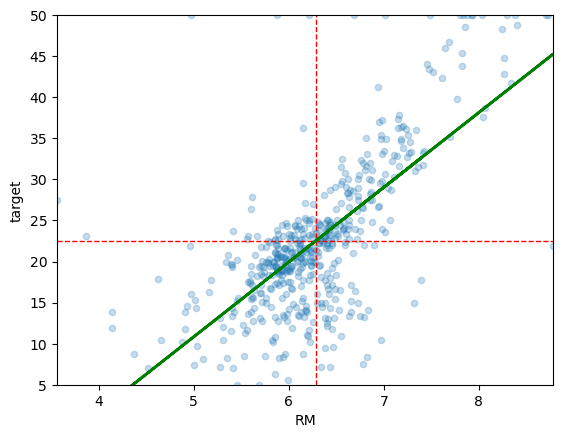

In [ ]:
x_range = [dataset['RM'].min(),dataset['RM'].max()] 
y_range = [dataset['target'].min(),dataset['target'].max()] 
scatter_plot = dataset.plot(kind='scatter', 
                            x='RM', y='target',
                            xlim=x_range, 
                            ylim=y_range,
                           alpha=0.25) 
meanY = scatter_plot.plot(x_range,
                          [dataset['target'].mean(),dataset['target'].mean()], 
                          '--', color='red', linewidth=1) 
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], 
                          y_range, '--', color='red', linewidth=1) 
regression_line = scatter_plot.plot(dataset['RM'], 
                                    fitted_values,
                                    '-',color='green', linewidth=2)

Además del método de predicción ya implementado, la generación de las predicciones es bastante fácil con solo utilizar la función `dot()` en NumPy.

In [ ]:
predictions_by_dot_product = np.dot(X,betas) 
print("Usando el método implementado:\n{}".format(fitted_values[:10].to_numpy()))
print("Usando el producto punto:\{}".format(predictions_by_dot_product[:10]))

Usando el método implementado:
[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]
Usando el producto punto:\[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


## Regresión con Scikit-learn 

Como hemos visto al trabajar con el paquete StatsModels, se puede construir un modelo lineal utilizando un paquete de aprendizaje automático más orientado como Scikit-learn. 

In [ ]:
"""
Usando el módulo `linear_model()`, podemos establecer un modelo de regresión lineal especificando que los predictores 
no deben ser normalizados y que nuestro modelo debe tener un sesgo:
"""
from sklearn import linear_model 
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [ ]:
"""
La preparación de los datos, en cambio, requiere el recuento de las observaciones y la preparación cuidadosa de la 
matriz del predictor para especificar sus dos dimensiones (si se deja como un vector, el procedimiento de ajuste error):
"""
observations = len(dataset) 
X = dataset['RM'].values.reshape((observations,1)) # X debe reformarse como una matrix renglón
print(X.shape)
y = dataset['target'].values # pero y seguirá siendo un vector
print(y.shape)

(506, 1)
(506,)


In [ ]:
"""
Una vez completados todos los pasos anteriores, podemos ajustar el modelo mediante el método de ajuste:
"""
linear_regression.fit(X,y)

C:\Users\julih\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

Una característica muy conveniente del paquete Scikit-learn es que todos los modelos, sin importar su tipo de complejidad, comparten los mismos métodos. 

In [ ]:
"""
El método `fit()` se utiliza siempre para el ajuste y espera una X y una y (cuando el modelo es supervisado). 
En cambio, los dos métodos habituales para hacer una predicción exacta (siempre para la regresión) y su probabilidad 
(cuando el modelo es probabilístico) son `predict()` y `predict_proba()`, respectivamente.
"""
print(linear_regression.coef_) 
print(linear_regression.intercept_)

[9.10210898]
-34.670620776438554


In [ ]:
"""
Utilizando el método de predicción y restringiéndonos los 10 primeros elementos de la lista resultante, 
obtenemos los 10 primeros valores ajustados:
"""
print(linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [ ]:
"""
Como se ha visto anteriormente, si preparamos una nueva matriz y añadimos una constante, 
podemos calcular los resultados por nosotros mismos utilizando una simple multiplicación matriz-vector:
"""
Xp = np.column_stack((X,np.ones(observations))) 
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]
print(v_coef)

[9.102108981180308, -34.670620776438554]


In [ ]:
"""
Como era de esperar, el resultado del producto nos proporciona las mismas estimaciones que el método de predicción:
"""
np.dot(Xp,v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

En este punto, sería natural cuestionar el uso de dicho módulo. En comparación con las funciones anteriores ofrecidas por Statsmodels, Scikit-learn parece ofrecer pocos resultados estadísticos, y aparentemente con muchas características de regresión lineal eliminadas.

 **En realidad, Scikit-learn ofrece exactamente lo que se necesita en la ciencia de los datos y tiene un rendimiento perfectamente rápido cuando se trata de grandes conjuntos de datos.**

Si estás trabajando en IPython, has la siguiente prueba para generar un gran conjunto de datos y comprobar el rendimiento de las dos versiones de la regresión lineal:

In [ ]:
# make_regression genera un problema de regresión aleatorio
from sklearn.datasets import make_regression 
HX, Hy = make_regression(n_samples=10000000, n_features=1,n_targets=1,random_state=101)

Después de generar diez millones de observaciones de una sola variable, comience a medir utilizando la función mágica %%time para IPython.

In [ ]:
%%time 
sk_linear_regression = linear_model.LinearRegression(
    normalize=False,
    fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

C:\Users\julih\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Wall time: 407 ms


LinearRegression(normalize=False)

In [ ]:
%%time 
sm_linear_regression = sm.OLS(
    Hy,
    sm.add_constant(HX))
sm_linear_regression.fit()

Wall time: 1.12 s


## Resumen

En este capítulo hemos presentado la regresión lineal como algoritmo de aprendizaje automático supervisado. 

Explicamos su forma funcional, su relación con las medidas estadísticas de la media y la correlación, e intentamos construir un modelo de regresión lineal simple sobre los datos de los precios de la vivienda en Boston. 

Después de hacer esto, finalmente echamos un vistazo a cómo funciona la regresión bajo el capó proponiendo sus formulaciones matemáticas clave y su traducción al código Python.

**¡Gracias por su participación!**